In [ ]:
from google.colab import drive #connecting to drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip '/content/gdrive/MyDrive/Colab Notebooks/archive (1).zip' -d data #unzipping data

Streaming output truncated to the last 5000 lines.
  inflating: data/utkface_aligned_cropped/crop_part1/34_1_0_20170109004755204.jpg.chip.jpg  
  inflating: data/utkface_aligned_cropped/crop_part1/34_1_0_20170111182452832.jpg.chip.jpg  
  inflating: data/utkface_aligned_cropped/crop_part1/34_1_1_20170103230340961.jpg.chip.jpg  
  inflating: data/utkface_aligned_cropped/crop_part1/34_1_1_20170104011329697.jpg.chip.jpg  
  inflating: data/utkface_aligned_cropped/crop_part1/34_1_1_20170104165020320.jpg.chip.jpg  
  inflating: data/utkface_aligned_cropped/crop_part1/34_1_1_20170108230211421.jpg.chip.jpg  
  inflating: data/utkface_aligned_cropped/crop_part1/34_1_2_20170104022134829.jpg.chip.jpg  
  inflating: data/utkface_aligned_cropped/crop_part1/34_1_2_20170104023010725.jpg.chip.jpg  
  inflating: data/utkface_aligned_cropped/crop_part1/34_1_2_20170104172537171.jpg.chip.jpg  
  inflating: data/utkface_aligned_cropped/crop_part1/34_1_2_20170104201443273.jpg.chip.jpg  
  inflating: data/u

In [ ]:
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt
import cv2
from keras.models import Sequential,load_model,Model
from keras.layers import Conv2D,MaxPool2D,Dense,Dropout,BatchNormalization,Flatten,Input, MaxPooling2D, concatenate
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from tensorflow.keras.utils import load_img
from tqdm.notebook import tqdm
from tensorflow.keras.optimizers import Adam

In [ ]:
path = "/content/data/UTKFace"   #sepersting data labels 
image_paths = []
age_labels = []
gender_labels = []

for filename in tqdm(os.listdir(path)):
    image_path = os.path.join(path, filename)
    temp = filename.split('_')
    age = int(temp[0])
    gender = int(temp[1])
    image_paths.append(image_path)
    age_labels.append(age)
    gender_labels.append(gender)

  0%|          | 0/23708 [00:00<?, ?it/s]

In [ ]:
df = pd.DataFrame() #converting labels into dataframe
df['image'], df['age'], df['gender'] = image_paths, age_labels, gender_labels
df.head()

,image,age,gender
0,/content/data/UTKFace/1_1_2_20161219221943799....,1,1
1,/content/data/UTKFace/78_0_0_20170116233355259...,78,0
2,/content/data/UTKFace/4_1_0_20170109190824547....,4,1
3,/content/data/UTKFace/25_1_2_20170104021935245...,25,1
4,/content/data/UTKFace/26_0_1_20170113134356512...,26,0


In [ ]:
df.shape

(23708, 3)

In [ ]:
gender_dict = {0:'Male', 1:'Female'}

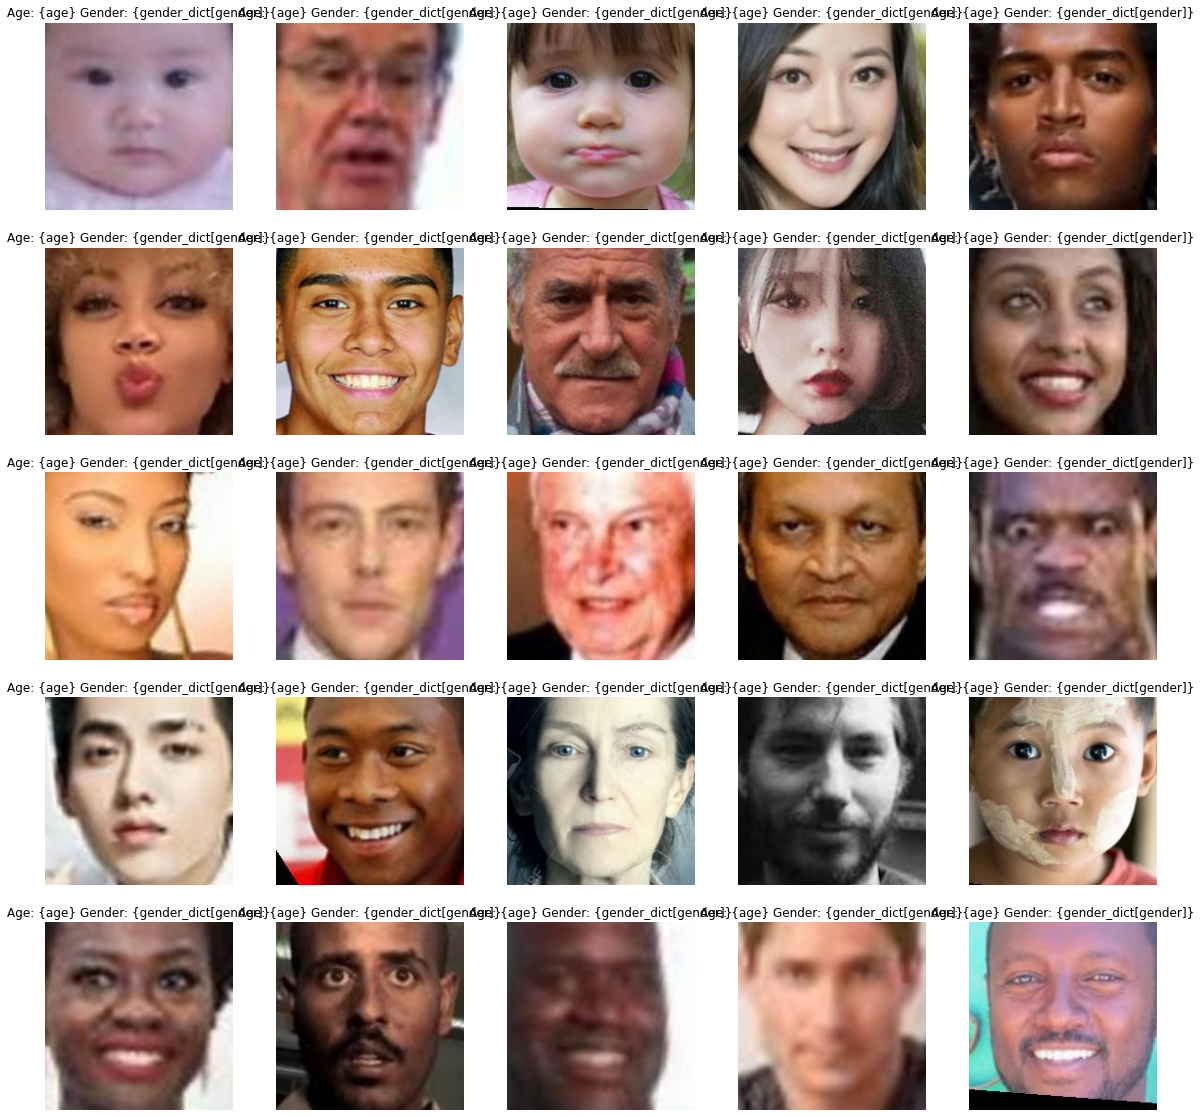

In [ ]:
plt.figure(figsize=(20, 20))  #loading first 25 images with there age and gender
files = df.iloc[0:25]

for index, file, age, gender in files.itertuples():
    plt.subplot(5, 5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title("Age: {age} Gender: {gender_dict[gender]}")
    plt.axis('off')

In [ ]:
from PIL import Image
def extract_features(images):  #extraxting features from images
    features = []
    for image in tqdm(images):
        img = load_img(image, grayscale=True)
        img = img.resize((128,128), Image.ANTIALIAS)
        img = np.array(img)
        features.append(img)
        
    features = np.array(features)
    # ignore this step if using RGB
    features = features.reshape(len(features),128,128, 1) #reshape them into (128,128)
    return features

In [ ]:
X1 = extract_features(df['image']) #defining image features as our X1

  0%|          | 0/23708 [00:00<?, ?it/s]

/usr/local/lib/python3.9/dist-packages/keras/utils/image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


In [ ]:
X1.shape

(23708, 128, 128, 1)

In [ ]:
X1 = X1/255.0 

In [ ]:
X2 = np.array(df['age']) #defining our second input of age

In [ ]:
y = np.array(df['gender'])#defining our label

In [ ]:
inputs = Input(shape=((128,128, 1))) #image input CNN model
conv_1 = Conv2D(32, kernel_size=(3, 3), activation='relu') (inputs)
maxp_1 = MaxPooling2D(pool_size=(2, 2)) (conv_1)
conv_2 = Conv2D(64, kernel_size=(3, 3), activation='relu') (maxp_1)
maxp_2 = MaxPooling2D(pool_size=(2, 2)) (conv_2)
conv_3 = Conv2D(128, kernel_size=(3, 3), activation='relu') (maxp_2)
maxp_3 = MaxPooling2D(pool_size=(2, 2)) (conv_3)
conv_4 = Conv2D(256, kernel_size=(3, 3), activation='relu') (maxp_3)
maxp_4 = MaxPooling2D(pool_size=(2, 2)) (conv_4)
conv_5 = Conv2D(512, kernel_size=(3, 3), activation='relu') (maxp_4)
maxp_5 = MaxPooling2D(pool_size=(2, 2)) (conv_5)
flatten = Flatten()(maxp_4)

inp_num = Input(shape=(1,)) #age input structure
x = Dense(256, activation='relu')(inp_num)
x2 = Dense(128, activation='relu')(x)
x3 = Dense(64, activation='relu')(x2)
out_num = Dense(32, activation='relu')(x3)

merged = concatenate([flatten, out_num]) #merging both inputs

dropout_1 = Dropout(0.2) (merged) #defining dropouts

out = Dense(1, activation='sigmoid', name='gender_out') (dropout_1) #last layer of output

model = Model([inputs, inp_num], out) #defining model inputs and outputs

model.compile(loss=['binary_crossentropy'], optimizer=Adam( lr = 1e-4 ), metrics=['accuracy']) #compiling model

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 126, 126, 32  320         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 63, 63, 32)   0           ['conv2d[0][0]']                 
                                                                                              

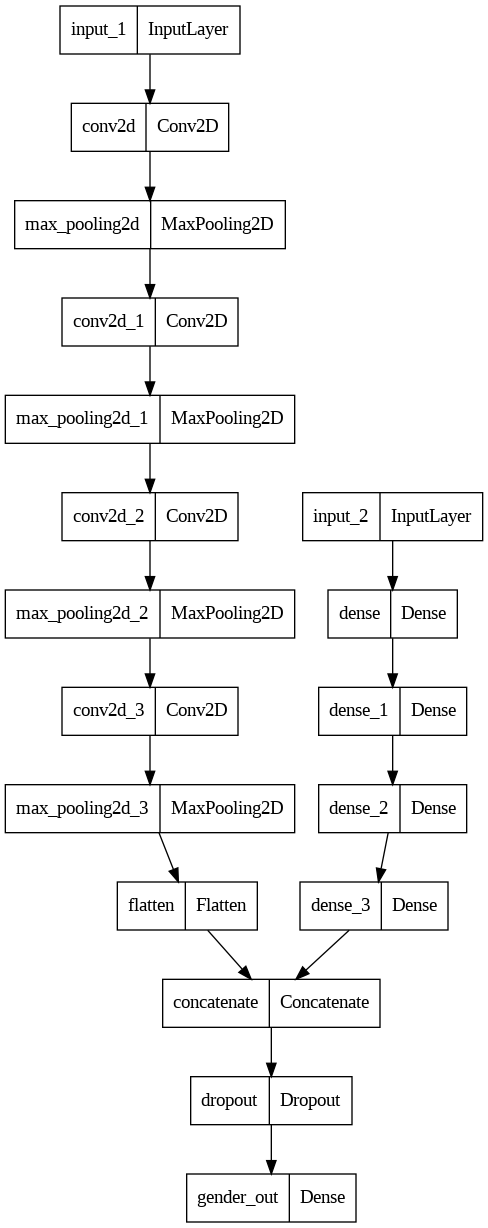

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model) #plotting model structure

In [ ]:
from keras.callbacks import Callback, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
# Learning Rate Reducer
learn_control = ReduceLROnPlateau(monitor='val_accuracy', patience=5,
                                  verbose=1,factor=0.2, min_lr=1e-4)


# Checkpoint
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [ ]:
history = model.fit(
    x = [X1,X2], #inputs
    y = y, #output
    batch_size = 32,
    epochs=20,
    validation_split = 0.2, #validation data
    callbacks=[learn_control, checkpoint]
)

Epoch 1/20
593/593 [==============================] - ETA: 0s - loss: 0.4384 - accuracy: 0.7908
Epoch 1: val_accuracy improved from -inf to 0.85407, saving model to weights.best.hdf5
593/593 [==============================] - 26s 22ms/step - loss: 0.4384 - accuracy: 0.7908 - val_loss: 0.3357 - val_accuracy: 0.8541 - lr: 0.0010
Epoch 2/20
591/593 [============================>.] - ETA: 0s - loss: 0.3297 - accuracy: 0.8565
Epoch 2: val_accuracy improved from 0.85407 to 0.88148, saving model to weights.best.hdf5
593/593 [==============================] - 12s 20ms/step - loss: 0.3296 - accuracy: 0.8566 - val_loss: 0.2874 - val_accuracy: 0.8815 - lr: 0.0010
Epoch 3/20
590/593 [============================>.] - ETA: 0s - loss: 0.2916 - accuracy: 0.8764
Epoch 3: val_accuracy did not improve from 0.88148
593/593 [==============================] - 11s 19ms/step - loss: 0.2911 - accuracy: 0.8767 - val_loss: 0.2930 - val_accuracy: 0.8762 - lr: 0.0010
Epoch 4/20
590/593 [==========================

<Figure size 432x288 with 0 Axes>

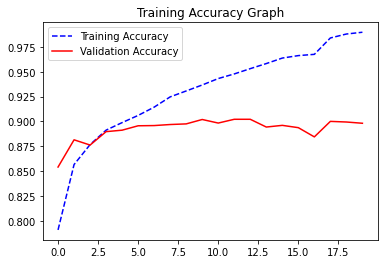

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot results for gender
acc = history.history['accuracy'] #Training Accuracy
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', linestyle='dashed', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.legend()
plt.title('Training Accuracy Graph')
plt.figure()

<Figure size 432x288 with 0 Axes>

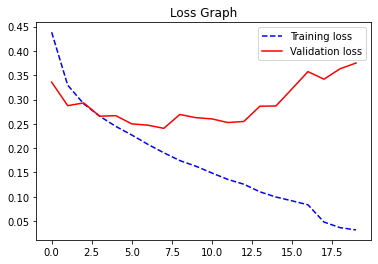

<Figure size 432x288 with 0 Axes>

In [ ]:
loss = history.history['loss'] #Training loss
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, loss,'b',linestyle='dashed',  label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Validation Loss Graph')
plt.title('Loss Graph')
plt.legend()
plt.figure()

In [ ]:
from numpy.random import seed #ti import model as it save
seed(42)
from keras.backend import manual_variable_initialization 
manual_variable_initialization(True)
import tensorflow
model = tensorflow.keras.models.load_model('/content/weights.best.hdf5') #importing model

In [ ]:
pred= model.predict([X1,X2]) #predicting from model

741/741 [==============================] - 4s 5ms/step


In [ ]:
pred

array([[3.5203642e-01],
       [7.2603025e-03],
       [9.4073969e-01],
       ...,
       [1.7205767e-03],
       [1.4778237e-05],
       [1.9583914e-02]], dtype=float32)

In [ ]:
preds =np.around(pred) #rounding of the predicted value

In [ ]:
preds

array([[0.],
       [0.],
       [1.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [ ]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 

report=classification_report(y , preds) #making classification report
print(report)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     12391
           1       0.97      0.95      0.96     11317

    accuracy                           0.96     23708
   macro avg       0.96      0.96      0.96     23708
weighted avg       0.96      0.96      0.96     23708



In [ ]:
results = confusion_matrix(y, preds) #making confusion_matrix

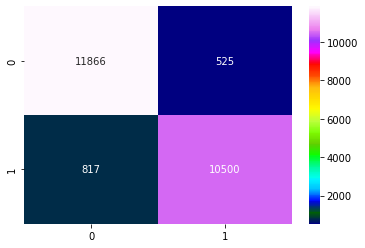

In [ ]:
import seaborn as sns

sns.heatmap(results, annot=True, cmap='gist_ncar', fmt='g') #plotting confusion_matrix on seaborn

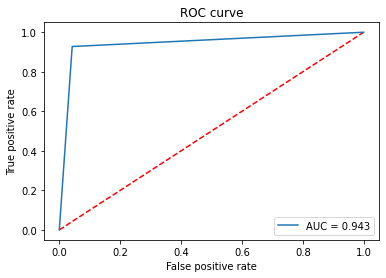

In [ ]:
from sklearn.metrics import roc_auc_score, auc
from sklearn.metrics import roc_curve

roc_log = roc_auc_score(y, np.around(preds)) #predicting Auc-Roc curve 
false_positive_rate, true_positive_rate, threshold = roc_curve(y, np.around(preds))
area_under_curve = auc(false_positive_rate, true_positive_rate) #calculating area under curve 

plt.plot([0, 1], [0, 1], 'r--') #plotting Auc-Roc curve
plt.plot(false_positive_rate, true_positive_rate, label='AUC = {:.3f}'.format(area_under_curve))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
#plt.savefig(ROC_PLOT_FILE, bbox_inches='tight')
plt.close()